Given a dataset containing two variables, TV advertising budget (in thousands of dollars) and sales (in thousands of units), what is the relationship between TV advertising expenditure and sales?

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest,f_regression

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\naimu\Softroniics\Assignments\tvmarketing.csv")

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.columns

Index(['TV', 'Sales'], dtype='object')

# Variable Description
* target variable(y):TV
* independent variable(x):Sales
    

In [6]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [7]:
df.shape

(200, 2)

In [8]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [9]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [10]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

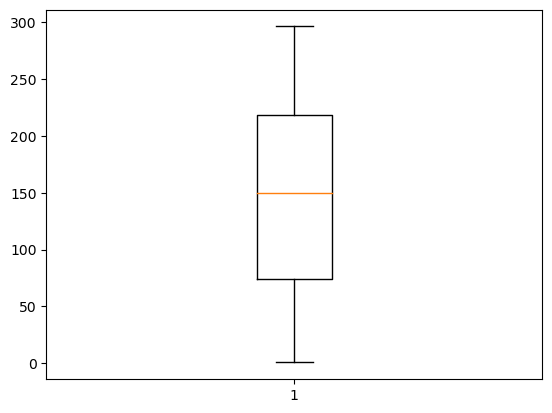

In [12]:
# check outlier in numeric colum
plt.boxplot(df["TV"])
plt.show()

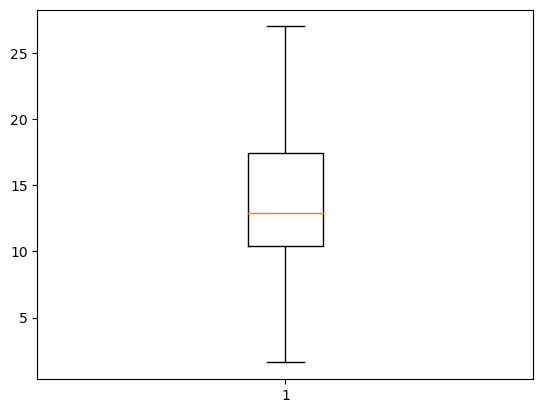

In [13]:
plt.boxplot(df["Sales"]) 
plt.show()

# EDA 

    * DISTRIBUTION 
    * DATA MIX
    * CORRELATION

In [14]:
df.columns 

Index(['TV', 'Sales'], dtype='object')

In [15]:
df.shape

(200, 2)

C:\Users\naimu\AppData\Local\Temp\ipykernel_20128\776149866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TV"])


<Axes: xlabel='TV', ylabel='Density'>

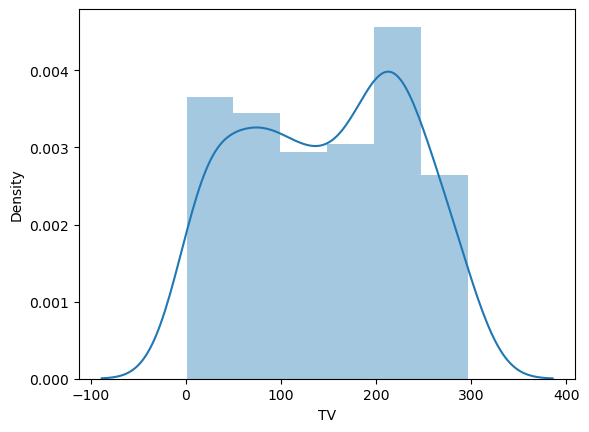

In [16]:
sns.distplot(df["TV"])

C:\Users\naimu\AppData\Local\Temp\ipykernel_20128\497969085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sales"])


<Axes: xlabel='Sales', ylabel='Density'>

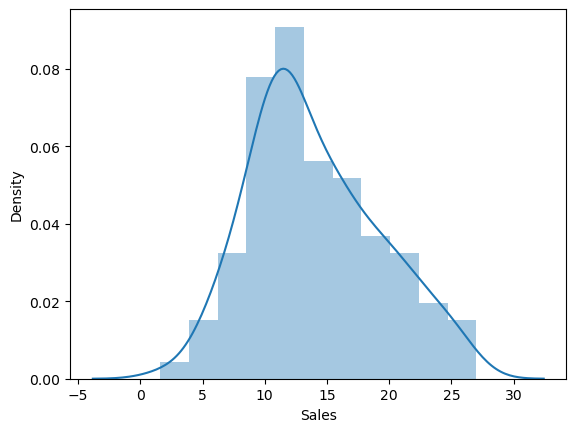

In [17]:
sns.distplot(df["Sales"])

In [18]:
# check data mix for categorical variables
# Cylindrer,Model_year,Car_name
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV'>

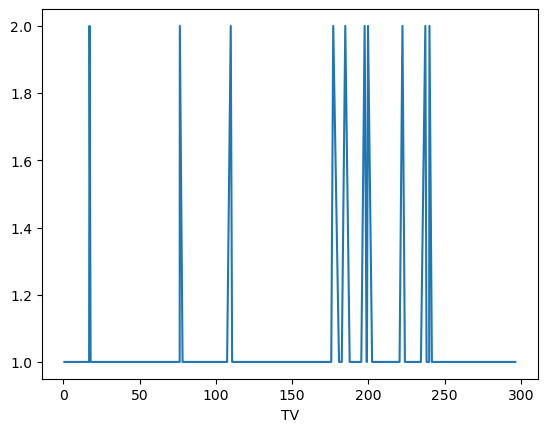

In [20]:
df.groupby("TV")["TV"].count().plot(kind = "line")

<Axes: xlabel='Sales'>

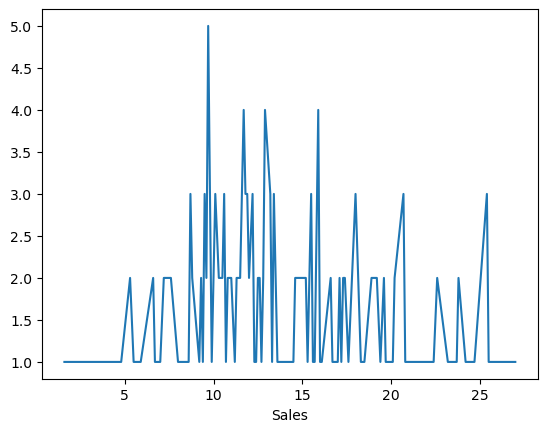

In [22]:
df.groupby("Sales")["Sales"].count().plot(kind = "line")

# pearson correlation

In [23]:
#create a set of numeric columns
df_numeric = df.select_dtypes(include = ["int64","float64"])
df_numeric.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: >

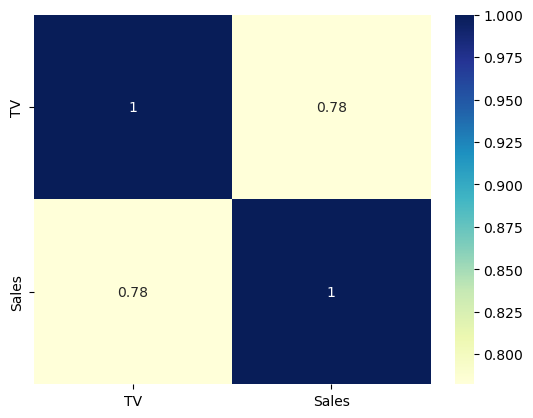

In [24]:
sns.heatmap(df_numeric.corr(),cmap ="YlGnBu",annot =True)

------------END OF EDA-------------------

In [25]:
df.columns

Index(['TV', 'Sales'], dtype='object')

## dummy conversion (one-hot ending)

In [28]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [30]:
# create x and y 

x = df.drop("TV",axis = 1)

y = df["TV"]

In [31]:
# from sklearn,feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
# testing and test sample
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.25,random_state=100)


In [59]:
#check sample size
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(150, 1) (50, 1) (150,) (50,)


## features selection
select significant variable

In [60]:
#craete a key_features object to select the top k features

key_features = SelectKBest(score_func = f_regression,k = 5) # to select 5 significant features

#fit the key features of training data and transform it
xtrain_selected = key_features.fit_transform(xtrain,ytrain)

selected_indices = key_features.get_support(indices =True)

selected_features = xtrain.columns[selected_indices]


C:\Users\naimu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=1. All the features will be returned.
  warnings.warn(


In [61]:
#print the significant variables
selected_features

Index(['Sales'], dtype='object')

## Build Linear Regression Model

In [62]:
# instantiate the linear regression function
linreg= LinearRegression()

# fit the model using training sample
linreg.fit(xtrain_selected,ytrain)

#print the accuracy of training model(Rsquared value)
linreg.score(xtrain_selected,ytrain)

0.6155412647986656

In [63]:
# evaluate the model on the test set using the selected features
xtest_selected = xtest.iloc[:,selected_indices]
score = linreg.score(xtest_selected,ytest)
score


C:\Users\naimu\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.5823849190756473

In [64]:
predicted_price = linreg.predict(xtest_selected)

C:\Users\naimu\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [65]:
#print predicted milege
print(predicted_price)

[ 49.09414717 236.29386171 189.82584746 219.03431356 250.89809476
 123.44296997 123.44296997 116.80468222 261.51935515 257.5363825
 119.45999732 223.01728621  76.97495572 168.58332666 102.20044917
  90.25153122 191.15350501 116.80468222 200.44710786 119.45999732
 192.48116256 107.51107937 258.86404005 188.49818991 167.25566911
 289.4001637  221.68962866 111.49405202 236.29386171 163.27269646
 142.03017567  84.94090102 115.47702467 159.28972381  72.99198307
 149.99612096  88.92387367 116.80468222 114.14936712 163.27269646
 188.49818991 148.66846342 153.97909361 123.44296997 136.71954547
 102.20044917  76.97495572 212.39602581 100.87279162  62.37072267]


In [66]:
#print B0(beta not=intercept)
linreg.intercept_

-38.531251117333056

In [67]:
#print beta values
linreg.coef_

array([13.2765755])